# Temporal Data EDA & Analysis
This notebook is going to do an analysis of the master geodataframe from the 'master_gdf.csv' file. We will start with some EDA to understand the data we are working with, and then trhough the use of plots we will try to find any patterns/findings/corrolations in the data.

## Setting Up Notebook
We start by importing the Python libraries we intend to use.

In [183]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Opening & Reading the Master Dataframe csv file and assiging it to a Dataframe
temp_master_df = pd.read_csv('master_gdf.csv')

# Displaying all the columns in the df
pd.set_option('display.max_columns', None)
temp_master_df.head()

/var/folders/_2/cgydxkl551d0xglwkkxfnqk00000gn/T/ipykernel_40782/780042662.py:7: DtypeWarning: Columns (37,39,40,44,45,46,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  temp_master_df = pd.read_csv('master_gdf.csv')


,ACCNUM,YEAR,DATE,TIME,collision_datetime,STREET1,STREET2,OFFSET,ROAD_CLASS,DISTRICT,WARDNUM,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,FATAL_NO,INITDIR,VEHTYPE,MANOEUVER,DRIVACT,DRIVCOND,PEDTYPE,PEDACT,PEDCOND,CYCLISTYPE,CYCACT,CYCCOND,PEDESTRIAN,CYCLIST,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,EMERG_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,collision_geometry,count_datetime,count_location,count_geometry,daily_sb_cars_r,daily_sb_cars_t,daily_sb_cars_l,daily_nb_cars_r,daily_nb_cars_t,daily_nb_cars_l,daily_wb_cars_r,daily_wb_cars_t,daily_wb_cars_l,daily_eb_cars_r,daily_eb_cars_t,daily_eb_cars_l,daily_sb_truck_r,daily_sb_truck_t,daily_sb_truck_l,daily_nb_truck_r,daily_nb_truck_t,daily_nb_truck_l,daily_wb_truck_r,daily_wb_truck_t,daily_wb_truck_l,daily_eb_truck_r,daily_eb_truck_t,daily_eb_truck_l,daily_sb_bus_r,daily_sb_bus_t,daily_sb_bus_l,daily_nb_bus_r,daily_nb_bus_t,daily_nb_bus_l,daily_wb_bus_r,daily_wb_bus_t,daily_wb_bus_l,daily_eb_bus_r,daily_eb_bus_t,daily_eb_bus_l,daily_nx_peds,daily_sx_peds,daily_ex_peds,daily_wx_peds,daily_nx_bike,daily_sx_bike,daily_ex_bike,daily_wx_bike,daily_nx_other,daily_sx_other,daily_ex_other,daily_wx_other,hourly_sb_cars_r,hourly_sb_cars_t,hourly_sb_cars_l,hourly_nb_cars_r,hourly_nb_cars_t,hourly_nb_cars_l,hourly_wb_cars_r,hourly_wb_cars_t,hourly_wb_cars_l,hourly_eb_cars_r,hourly_eb_cars_t,hourly_eb_cars_l,hourly_sb_truck_r,hourly_sb_truck_t,hourly_sb_truck_l,hourly_nb_truck_r,hourly_nb_truck_t,hourly_nb_truck_l,hourly_wb_truck_r,hourly_wb_truck_t,hourly_wb_truck_l,hourly_eb_truck_r,hourly_eb_truck_t,hourly_eb_truck_l,hourly_sb_bus_r,hourly_sb_bus_t,hourly_sb_bus_l,hourly_nb_bus_r,hourly_nb_bus_t,hourly_nb_bus_l,hourly_wb_bus_r,hourly_wb_bus_t,hourly_wb_bus_l,hourly_eb_bus_r,hourly_eb_bus_t,hourly_eb_bus_l,hourly_nx_peds,hourly_sx_peds,hourly_ex_peds,hourly_wx_peds,hourly_nx_bike,hourly_sx_bike,hourly_ex_bike,hourly_wx_bike,hourly_nx_other,hourly_sx_other,hourly_ex_other,hourly_wx_other
0,1237939.0,2011.0,2011-03-09,726,2011-03-09 07:26:00,COLLEGE Stre,BATHURST Stre,NaN,Major Arterial,Toronto and East York,11.0,Intersection,At Intersection,No Control,Rain,Daylight,Wet,Non-Fatal Injury,Pedestrian Collisions,Pedestrian,30 to 34,Major,NaN,NaN,Other,NaN,NaN,NaN,Pedestrian hit at mid-block,Other,Normal,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,Kensington-Chinatown,78,Kensington-Chinatown (78),D14,POINT (-79.40769 43.656445),2011-06-01 08:00:00,BATHURST ST AT COLLEGE ST (PX 300),POINT (-79.4077219983631 43.6564809958047),417.0,3954.0,1190.0,929.0,3690.0,194.0,1078.0,3326.0,142.0,677.0,3769.0,167.0,17.0,126.0,24.0,22.0,156.0,0.0,28.0,116.0,10.0,19.0,218.0,12.0,0.0,135.0,20.0,9.0,99.0,0.0,14.0,202.0,12.0,20.0,183.0,19.0,1876.0,2220.0,1923.0,1190.0,253.0,234.0,797.0,1647.0,0.0,0.0,0.0,0.0,78.0,940.0,289.0,119.0,507.0,30.0,136.0,472.0,6.0,96.0,834.0,1.0,3.0,20.0,9.0,0.0,21.0,0.0,10.0,14.0,0.0,1.0,30.0,0.0,0.0,20.0,2.0,2.0,19.0,0.0,2.0,35.0,0.0,1.0,38.0,0.0,195.0,98.0,208.0,160.0,50.0,2.0,43.0,312.0,0.0,0.0,0.0,0.0
1,1232522.0,2011.0,2011-03-09,1145,2011-03-09 11:45:00,JANE ST,ST JOHNS RD,NaN,Major Arterial,Toronto and East York,4.0,Intersection,NaN,Traffic Signal,Snow,Daylight,Wet,Non-Fatal Injury,Pedestrian Collisions,Vehicle Owner,unknown,NaN,NaN,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,89,Runnymede-Bloor West Village,89,Runnymede-Bloor West Village (89),D11,POINT (-79.48969 43.661945),2018-04-03 08:00:00,JANE ST AT ST JOHNS RD (PX 523),POINT (-79.48966999735359 43.6619929963657),92.0,4397.0,397.0,172.0,4413.0,79.0,475.0,247.0,201.0,154.0,217.0,143.0,0.0,101.0,3.0,2.0,96.0,1.0,4.0,1.0,3.0,1.0,0.0,1.0,0.0,185.0,0.0,0.0,166.0,1.0,2.0,0.0,1.0,2.0,2.0,5.0,189.0,222.0,210.0,117.0,9.0,17.0,20.0,10.0,0.0,0.0,0.0,0.0,11.0,742.0,125.0,36.0,887.0,7.0,102.0,44.0,36.0,33.0,54.0,37.0,0.0,29.0,1.0,0.0,10.0,0.

## Temporal Data EDA
We are first going to familiarize ourselves with the data and columns and columns types, as well as understand the shape of the df.

In [184]:
# Listing df columns
col_list = list(temp_master_df.columns)
print(col_list)

# Checking df shape
print(temp_master_df.shape)

['ACCNUM', 'YEAR', 'DATE', 'TIME', 'collision_datetime', 'STREET1', 'STREET2', 'OFFSET', 'ROAD_CLASS', 'DISTRICT', 'WARDNUM', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'FATAL_NO', 'INITDIR', 'VEHTYPE', 'MANOEUVER', 'DRIVACT', 'DRIVCOND', 'PEDTYPE', 'PEDACT', 'PEDCOND', 'CYCLISTYPE', 'CYCACT', 'CYCCOND', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'EMERG_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY', 'HOOD_158', 'NEIGHBOURHOOD_158', 'HOOD_140', 'NEIGHBOURHOOD_140', 'DIVISION', 'collision_geometry', 'count_datetime', 'count_location', 'count_geometry', 'daily_sb_cars_r', 'daily_sb_cars_t', 'daily_sb_cars_l', 'daily_nb_cars_r', 'daily_nb_cars_t', 'daily_nb_cars_l', 'daily_wb_cars_r', 'daily_wb_cars_t', 'daily_wb_cars_l', 'daily_eb_cars_r', 'daily_eb_cars_t', 'daily_eb_cars_l', 'daily_sb_truck_r', 'daily_sb_truck_t', 'daily_sb_truck_l', 'daily

We are also checking the 'collision_datetime' column is in datetime format.

In [185]:
# Ensure 'collision_datetime' column is in datetime format
temp_master_df['collision_datetime'] = pd.to_datetime(temp_master_df['collision_datetime'], format='%Y-%m-%d %H:%M:%S')

## Monthly Time Series Plots

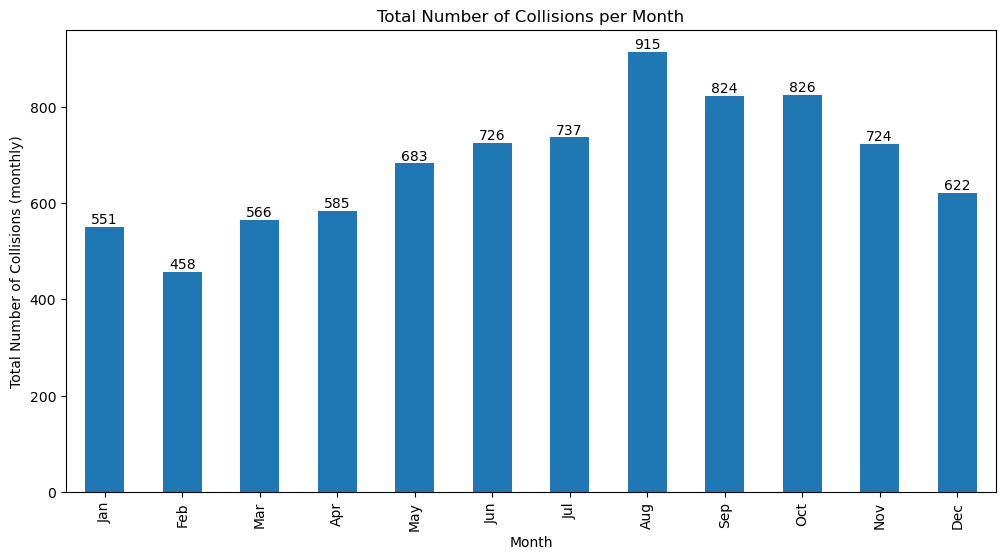

In [186]:
## Total Number of Collisions Each Month
# Extract the month from the datetime column
temp_master_df['month'] = temp_master_df['collision_datetime'].dt.month

# Group by month and calculate the count
monthly_counts = temp_master_df.groupby('month').size()

# Define month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Update the x-axis labels
monthly_counts.index = monthly_counts.index.map(lambda x: month_names[x-1])

# Plot the results
ax = monthly_counts.plot(kind='bar', title='Total Number of Collisions per Month', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Total Number of Collisions (monthly)')

# Add labels at the top of each bar
for i, v in enumerate(monthly_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')
    
plt.show()

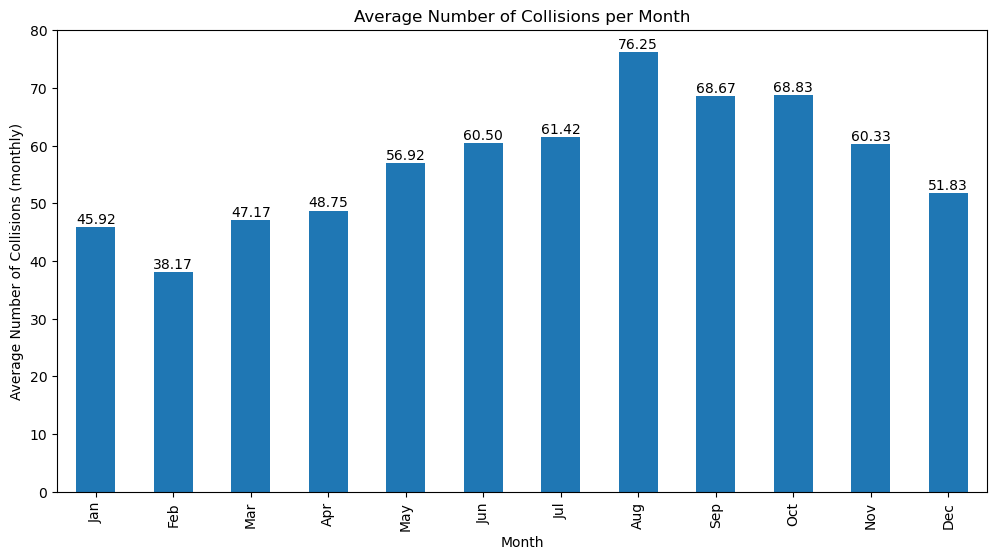

In [187]:
## Average Number of Collisions Each Month
# Extract the year and month from the datetime column
temp_master_df['year'] = temp_master_df['collision_datetime'].dt.year
temp_master_df['month'] = temp_master_df['collision_datetime'].dt.month

# Group by year and month, then calculate the average count
monthly_avg = temp_master_df.groupby(['year', 'month']).size().groupby('month').mean()

# Define month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Update the x-axis labels
monthly_avg.index = monthly_avg.index.map(lambda x: month_names[x-1])

# Plot the results
ax = monthly_avg.plot(kind='bar', title='Average Number of Collisions per Month', figsize=(12, 6))
plt.xlabel('Month')
plt.ylabel('Average Number of Collisions (monthly)')

# Add labels at the top of each bar
for i, v in enumerate(monthly_avg):
    ax.text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.show()

## Yearly Time Series Plots

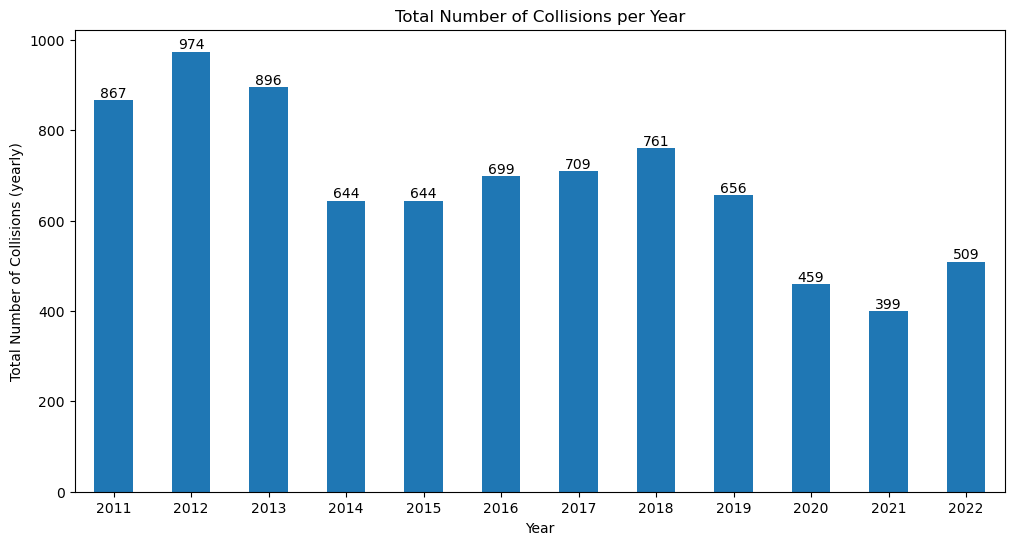

In [188]:
## Total Number of Collisions Each Year
# Extract the year from the datetime column
temp_master_df['year'] = temp_master_df['collision_datetime'].dt.year

# Group by year and calculate the count
yearly_counts = temp_master_df.groupby('year').size()

# Plot the results
ax = yearly_counts.plot(kind='bar', title='Total Number of Collisions per Year', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Total Number of Collisions (yearly)')

# Add labels at the top of each bar
for i, v in enumerate(yearly_counts):
    ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Format x-axis labels to display only the year in YYYY format
plt.xticks(rotation=0, ha='center')

plt.show()

## Seasonal Time Series Yearly Plot

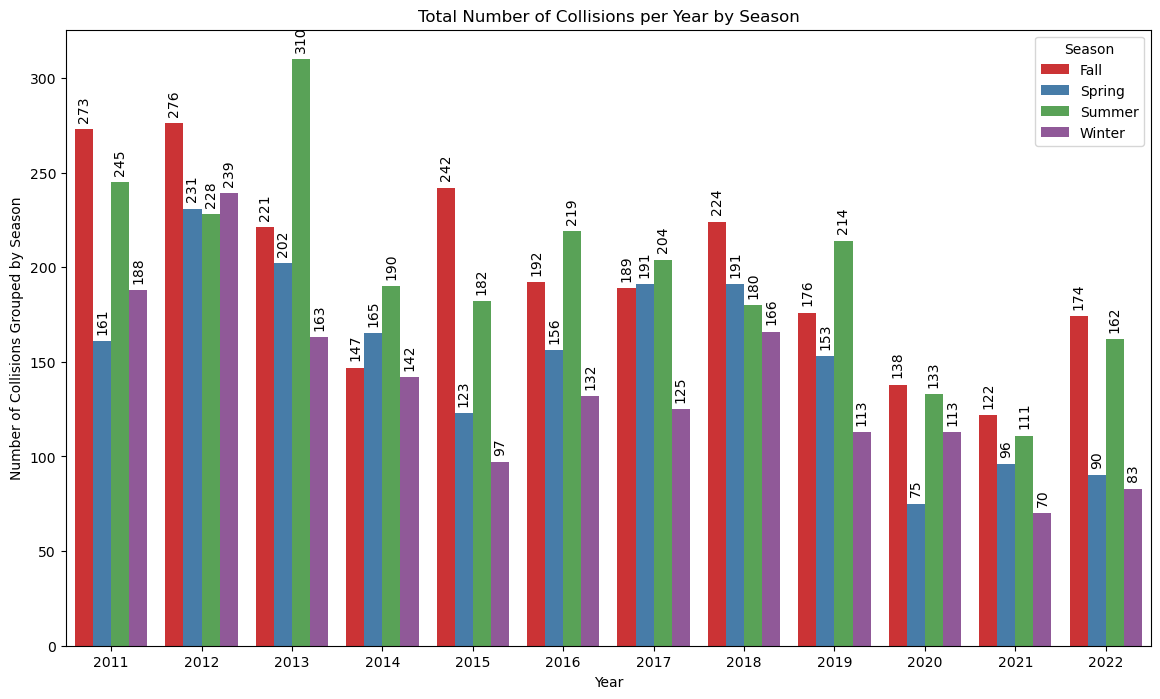

In [189]:
# Extract Year and Season
temp_master_df['Year'] = temp_master_df['collision_datetime'].dt.year
temp_master_df['Season'] = temp_master_df['collision_datetime'].dt.month.apply(lambda month: (
    'Summer' if month in [6, 7, 8] else
    'Spring' if month in [3, 4, 5] else
    'Winter' if month in [12, 1, 2] else
    'Fall'
))

# Count the number of rows for each Year and Season (unique combinations)
seasonal_counts_corrected = temp_master_df.groupby(['Year', 'Season']).size().reset_index(name='Collisions')

# Plotting using Seaborn with the modified color order
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=seasonal_counts_corrected, x='Year', y='Collisions', hue='Season', palette='Set1', ci=None)
plt.title('Total Number of Collisions per Year by Season')
plt.xlabel('Year')
plt.ylabel('Number of Collisions Grouped by Season')
plt.legend(title='Season', loc='upper right')

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', rotation=90)

plt.show()

## Hourly Time Series Plot

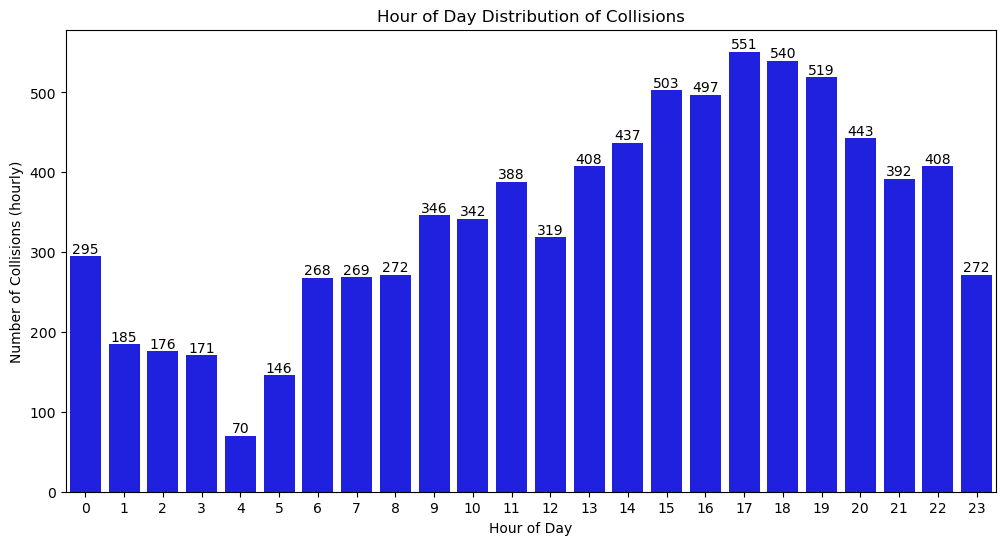

In [190]:
# Extract Week, Month, and Year
temp_master_df['Week'] = temp_master_df['collision_datetime'].dt.isocalendar().week
temp_master_df['Month'] = temp_master_df['collision_datetime'].dt.month
temp_master_df['Year'] = temp_master_df['collision_datetime'].dt.year

# Create a pivot table for the heatmap
heatmap_data_monthly = temp_master_df.pivot_table(index='INJURY', columns='Month', values='collision_datetime', aggfunc='count')
heatmap_data_annual = temp_master_df.pivot_table(index='INJURY', columns='Year', values='collision_datetime', aggfunc='count')

# Create a new column for the hour of the day
temp_master_df['HourOfDay'] = temp_master_df['collision_datetime'].dt.hour

# Group by Hour of Day and calculate the count of occurrences
hourofday_counts = temp_master_df.groupby('HourOfDay').size().reset_index(name='Collisions')

# Plotting Hour of Day Bar Plot with all bars in the same color and annotations
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=hourofday_counts, x='HourOfDay', y='Collisions', color='b')
plt.title('Hour of Day Distribution of Collisions')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions (hourly)')

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

## Severity of Collisions

### Monthly Heatmap

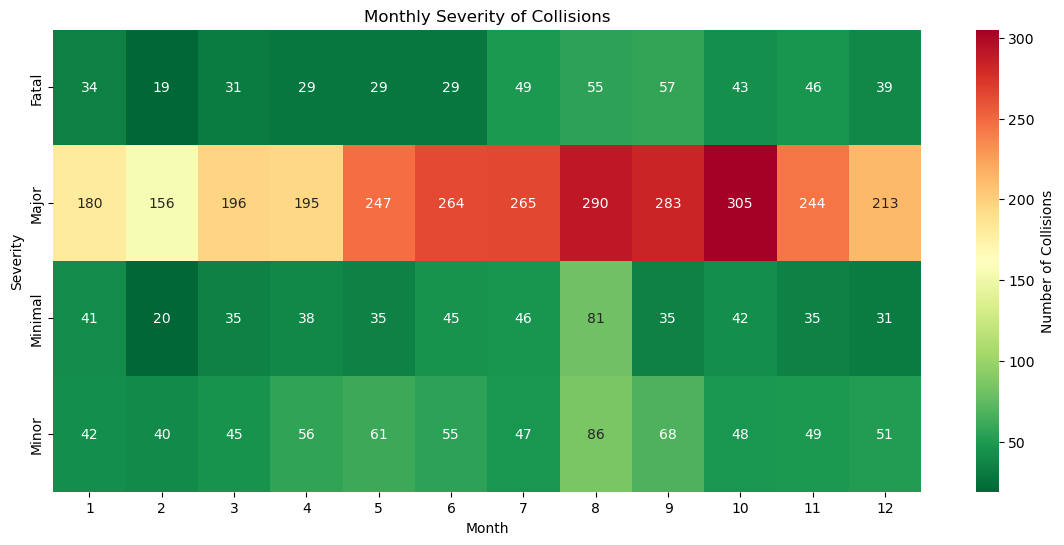

In [191]:
## NOTE - note all collisions (rows) have a value indicating severity -> counts may not sum to total

# Plotting Monthly Heatmap with color reversed
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_monthly, cmap='RdYlGn_r', annot=True, fmt='d', cbar_kws={'label': 'Number of Collisions'})
plt.title('Monthly Severity of Collisions')
plt.xlabel('Month')
plt.ylabel('Severity')
plt.show()

### Annual Heatmap

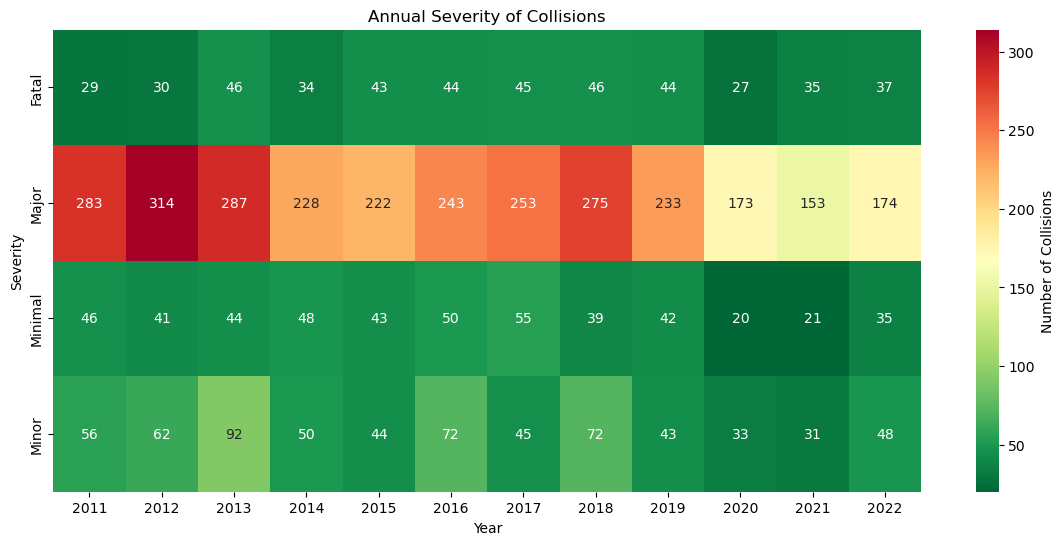

In [192]:
# Plotting Annual Heatmap with color reversed
plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data_annual, cmap='RdYlGn_r', annot=True, fmt='d', cbar_kws={'label': 'Number of Collisions'})
plt.title('Annual Severity of Collisions')
plt.xlabel('Year')
plt.ylabel('Severity')
plt.show()

## Weekend & Weekend Collisions Count

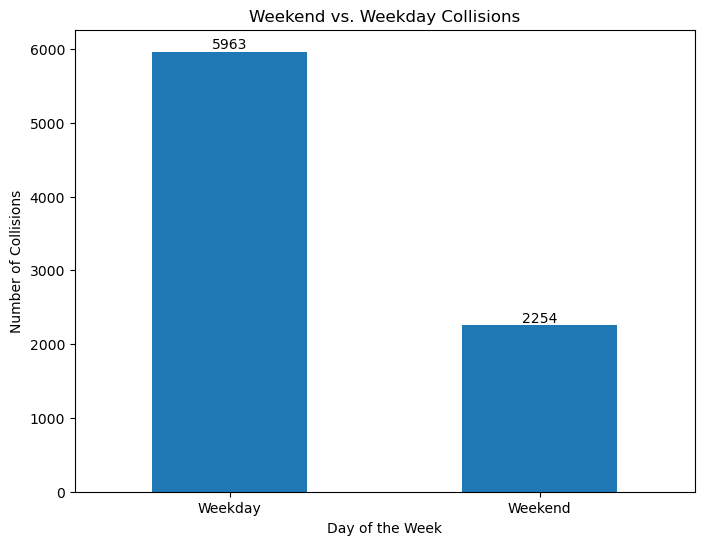

In [199]:
# Create a new column 'DayOfWeek' to store the day of the week
temp_master_df['DayOfWeek'] = temp_master_df['collision_datetime'].dt.day_name()

# Create a new column 'IsWeekend' to indicate whether it's a weekend or weekday
temp_master_df['IsWeekend'] = temp_master_df['collision_datetime'].dt.dayofweek // 5 == 1

# Group by 'IsWeekend' and calculate the count for each group
collision_counts = temp_master_df.groupby('IsWeekend').size()

# Plot the results with count annotations
plt.figure(figsize=(8, 6))
ax = collision_counts.plot(kind='bar')
plt.title('Weekend vs. Weekday Collisions')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Collisions')
plt.xticks([0, 1], ['Weekday', 'Weekend'], rotation=0)

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

## Corralation Between Collisions and Visibility

### Including "Clear" Conditions

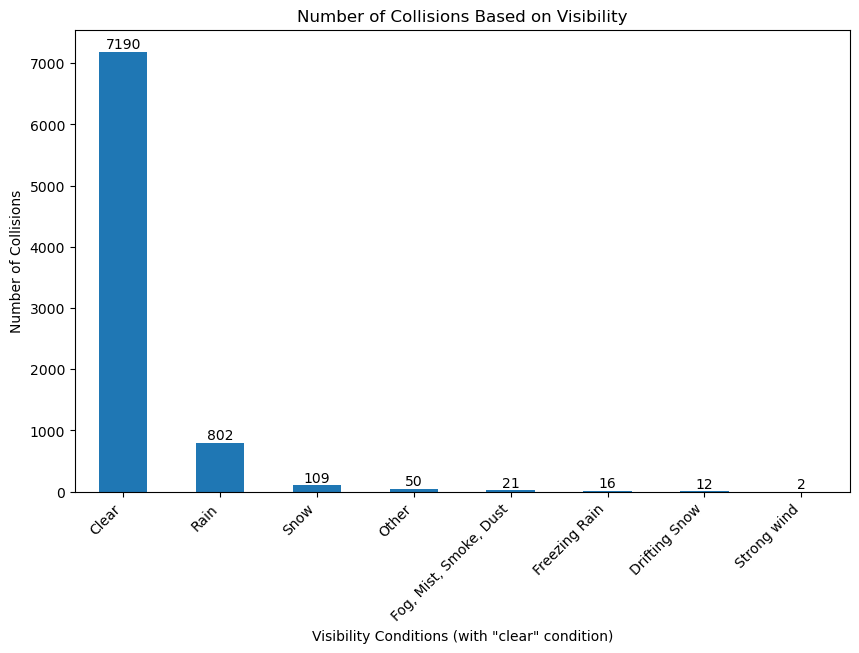

In [200]:
# Assuming your DataFrame is named 'temp_master_df' and contains a 'Visibility' column
visibility_counts = temp_master_df['VISIBILITY'].value_counts()

# Plotting the results with count annotations
plt.figure(figsize=(10, 6))
ax = visibility_counts.plot(kind='bar')
plt.title('Number of Collisions Based on Visibility')
plt.xlabel('Visibility Conditions (with "clear" condition)')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### Excluding "Clear" Conditions

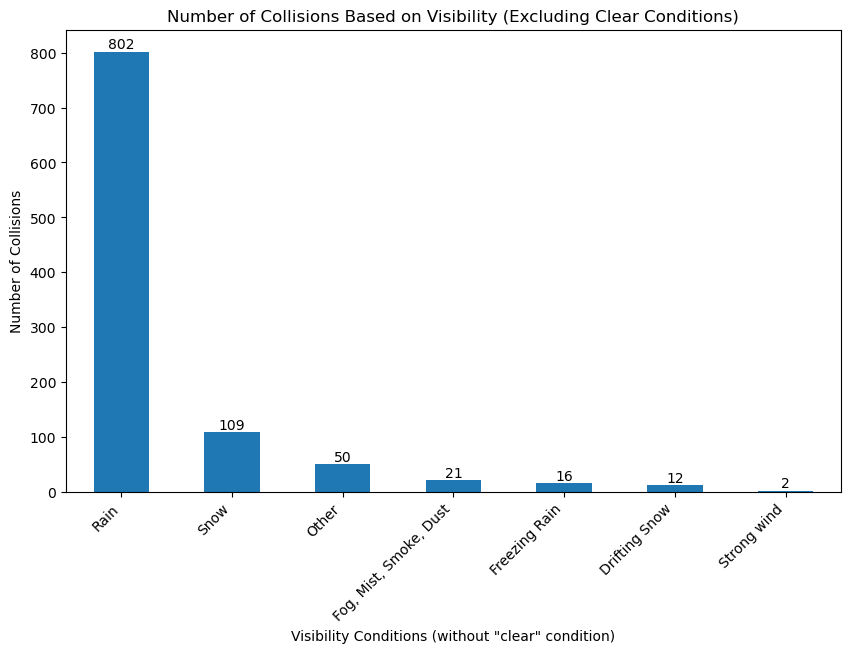

In [201]:
# Exclude rows where 'Visibility' is 'Clear'
filtered_df = temp_master_df[temp_master_df['VISIBILITY'] != 'Clear']

# Count the occurrences of each unique value in the 'Visibility' column
visibility_counts = filtered_df['VISIBILITY'].value_counts()

# Plotting the results with count annotations
plt.figure(figsize=(10, 6))
ax = visibility_counts.plot(kind='bar')
plt.title('Number of Collisions Based on Visibility (Excluding Clear Conditions)')
plt.xlabel('Visibility Conditions (without "clear" condition)')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

## Correlation Between Collisions and Light Conditions

### Including Daylight

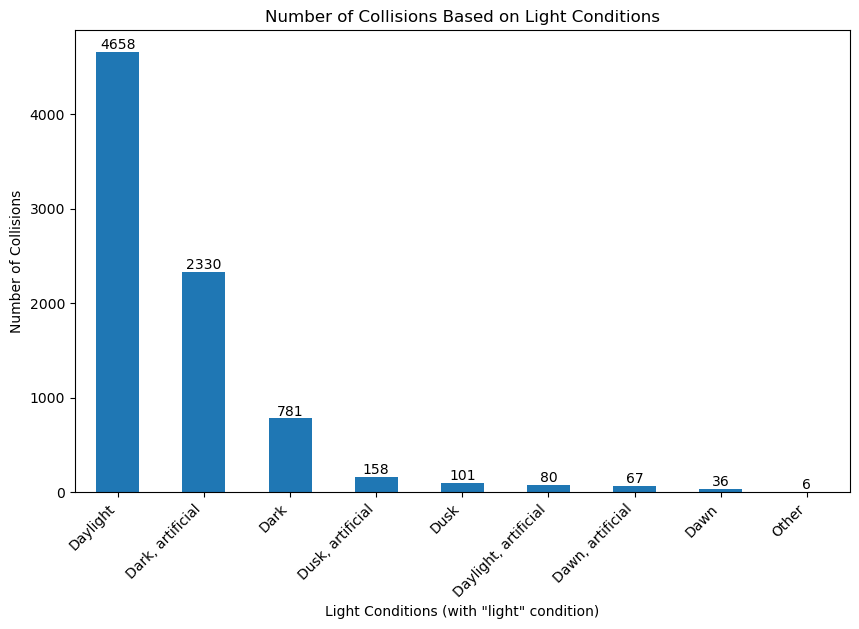

In [202]:
# Count the occurrences of each unique value in the 'LIGHT' column
light_counts = temp_master_df['LIGHT'].value_counts()

# Plotting the results with count annotations
plt.figure(figsize=(10, 6))
ax = light_counts.plot(kind='bar')
plt.title('Number of Collisions Based on Light Conditions')
plt.xlabel('Light Conditions (with "light" condition)')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

### Exclusing Daylight

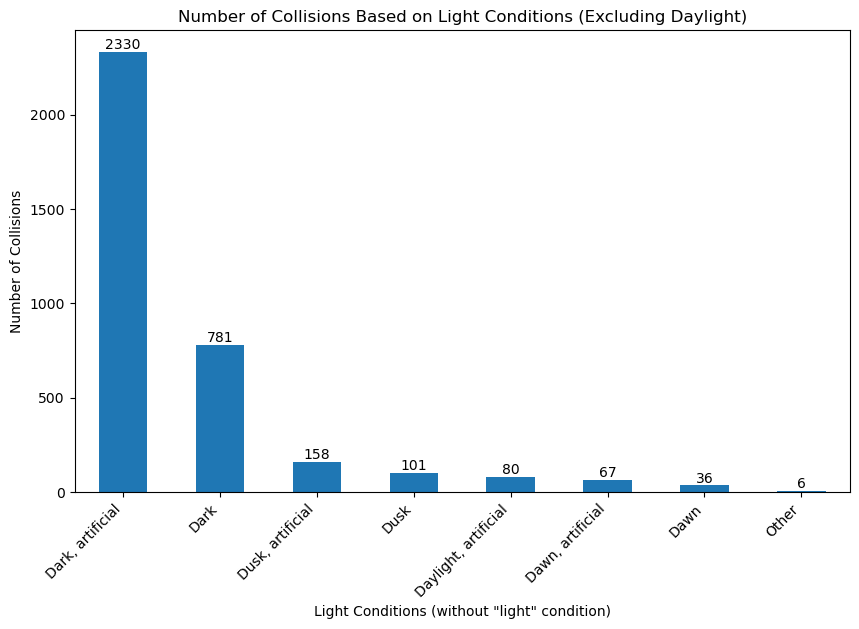

In [203]:
# Exclude rows where 'LIGHT' is 'Daylight'
filtered_df = temp_master_df[temp_master_df['LIGHT'] != 'Daylight']

# Count the occurrences of each unique value in the 'LIGHT' column
light_counts = filtered_df['LIGHT'].value_counts()

# Plotting the results with count annotations
plt.figure(figsize=(10, 6))
ax = light_counts.plot(kind='bar')
plt.title('Number of Collisions Based on Light Conditions (Excluding Daylight)')
plt.xlabel('Light Conditions (without "light" condition)')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add labels at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

## Summary of time series

In [204]:
# Aggregate by Day
daily_aggregated = temp_master_df.groupby(temp_master_df['collision_datetime'].dt.date).size()

# Aggregate by Week
weekly_aggregated = temp_master_df.resample('W-Mon', on='collision_datetime').size()

# Aggregate by Month
monthly_aggregated = temp_master_df.resample('M', on='collision_datetime').size()

# Aggregate by Year
yearly_aggregated = temp_master_df.resample('Y', on='collision_datetime').size()

# Statistical Analysis
daily_stats = daily_aggregated.describe()
weekly_stats = weekly_aggregated.describe()
monthly_stats = monthly_aggregated.describe()
yearly_stats = yearly_aggregated.describe()

# Display statistical summaries
print("Daily Stats:")
print(daily_stats)
print("\nWeekly Stats:")
print(weekly_stats)
print("\nMonthly Stats:")
print(monthly_stats)
print("\nYearly Stats:")
print(yearly_stats)

Daily Stats:
count    2141.000000
mean        3.837926
std         2.508747
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        27.000000
dtype: float64

Weekly Stats:
count    627.000000
mean      13.105263
std        7.826703
min        0.000000
25%        7.000000
50%       12.000000
75%       17.500000
max       45.000000
dtype: float64

Monthly Stats:
count    144.000000
mean      57.062500
std       21.932579
min       15.000000
25%       41.000000
50%       56.000000
75%       72.000000
max      127.000000
dtype: float64

Yearly Stats:
count     12.000000
mean     684.750000
std      174.711255
min      399.000000
25%      610.250000
50%      677.500000
75%      787.500000
max      974.000000
dtype: float64
